# Data Processing
### Convert easy data set to HOG features

In [13]:
import cv2
import os
import os.path as osp
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

from datetime import datetime

from skimage.morphology import skeletonize
from skimage.morphology import thin
from skimage import data
from skimage.util import invert
from skimage.color import rgb2gray
from skimage.feature import hog
from skimage.transform import resize

In [14]:
def get_hog_features(in_img):

    MAX_ROW_SIZE = 100
    
    # first resize the image
    if in_img.shape[0] > MAX_ROW_SIZE:
        resized_img = resize(
            in_img, 
            (
                MAX_ROW_SIZE, 
                int( ((1.0*MAX_ROW_SIZE)/in_img.shape[0]) * in_img.shape[1] )  
            )
        )
    else:
        resized_img = in_img
        
    fd, hog_image = hog(
        resized_img, 
        orientations=9, 
        pixels_per_cell=(2, 2),
        cells_per_block=(2, 2), 
        visualize=True
    )
    
    return hog_image


def flatten_hog_version(frames):
    return [get_hog_features(f).flatten() for f in frames]


def flatten_objSeg_version(frames):
    return [get_hog_features(f).flatten() for f in frames]

In [20]:
def to_df_hog_only(
    df,
    save_path
):
    df = df.copy()
    
    i = 0
    prev_progress = 0
    size = len(df)
    
    res = []
    for index, row in df.iterrows():
        
        hog = get_hog_features(row["image"])
        res.append(hog)

        i += 1
        cur_progress = int((i+1)*100/size)
        if cur_progress >= prev_progress + 2:
            print(f"progress: {cur_progress}%")
            print(f"processing {index} at {datetime.now()}")
            prev_progress = cur_progress
            
    df["image"] = res
    df.to_pickle(save_path)

    return df

In [10]:
from nebula.common import write_pickle, read_pickle, display

In [16]:
image_pickle_path = 'C:/Users/aphri/Documents/t0002/pycharm/data/yg_ar/image_easy2_df.pkl'
hog_pickle_path = 'C:/Users/aphri/Documents/t0002/pycharm/data/yg_ar/image_easy2_df_hog.pkl'

In [17]:
df = read_pickle(image_pickle_path)

In [9]:
hog = get_hog_features(df["image"].iloc[0])

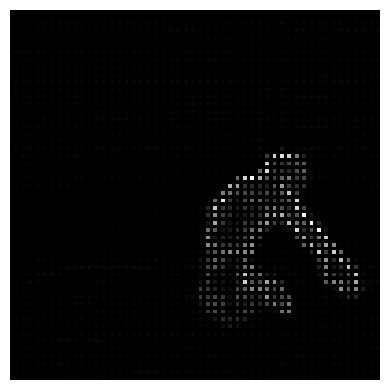

In [11]:
display(hog)

In [21]:
to_df_hog_only(df, hog_pickle_path)

progress: 2%
processing 398 at 2023-04-11 01:57:19.855458
progress: 4%
processing 798 at 2023-04-11 02:00:35.791267
progress: 6%
processing 1198 at 2023-04-11 02:04:10.123223
progress: 8%
processing 1598 at 2023-04-11 02:07:30.710095
progress: 10%
processing 1998 at 2023-04-11 02:10:41.378845
progress: 12%
processing 2398 at 2023-04-11 02:14:00.042975
progress: 14%
processing 2798 at 2023-04-11 02:17:02.719250
progress: 16%
processing 3198 at 2023-04-11 02:20:23.080227
progress: 18%
processing 3598 at 2023-04-11 02:23:26.934202
progress: 20%
processing 3998 at 2023-04-11 02:26:33.251517
progress: 22%
processing 4398 at 2023-04-11 02:29:35.668103
progress: 24%
processing 4798 at 2023-04-11 02:32:37.285316
progress: 26%
processing 5198 at 2023-04-11 02:35:50.261882
progress: 28%
processing 5598 at 2023-04-11 02:38:57.094198
progress: 30%
processing 5998 at 2023-04-11 02:42:09.679923
progress: 32%
processing 6398 at 2023-04-11 02:45:55.214886
progress: 34%
processing 6798 at 2023-04-11 02

,image,label_a,label_at,file_name
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",camel,camel_1,camel_1_hair_0_cloth_0_pants_3_Z1012_XOP4_YOP2...
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",camel,camel_1,camel_1_hair_0_cloth_0_pants_3_Z1031_XOP3_YON4...
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",camel,camel_1,camel_1_hair_0_cloth_0_pants_3_Z1052_XOP1_YOP8...
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",camel,camel_1,camel_1_hair_0_cloth_0_pants_3_Z1056_XON9_YON3...
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",camel,camel_1,camel_1_hair_0_cloth_0_pants_3_Z1081_XOP13_YOP...
...,...,...,...,...
19995,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",warrior_II,warrior_II_4,warrior_II_4_hair_3_cloth_3_pants_1_Z957_XON15...
19996,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",warrior_II,warrior_II_4,warrior_II_4_hair_3_cloth_3_pants_1_Z963_XON7_...
19997,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",warrior_II,warrior_II_4,warrior_II_4_hair_3_cloth_3_pants_1_Z979_XOP11...
19998,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",warrior_II,warrior_II_4,warrior_II_4_hair_3_cloth_3_pants_1_Z983_XOP1_...


In [22]:
hog_df = pd.read_pickle(hog_pickle_path)

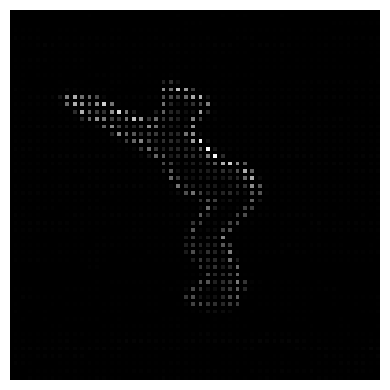

In [29]:
display(hog_df["image"].iloc[2801])